<a href="https://colab.research.google.com/github/soumya0422/FitPulse-Health-Anomaly-Detection-from-Fitness-Devices-/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
df = files.upload()

Saving Cleaned_Data.csv to Cleaned_Data (1).csv


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Cleaned_Data.csv')

In [ ]:
df

,Id,Time,heart_rate,Steps_per_minute,Sleep_per_minute
0,2022484408,2016-04-12 07:21:00,101.600000,14.116667,0.0
1,2022484408,2016-04-12 07:22:00,87.888889,14.116667,0.0
2,2022484408,2016-04-12 07:23:00,58.000000,14.116667,0.0
3,2022484408,2016-04-12 07:24:00,58.000000,14.116667,0.0
4,2022484408,2016-04-12 07:25:00,56.777778,14.116667,0.0
...,...,...,...,...,...
334625,8877689391,2016-05-12 14:40:00,56.222222,7.616667,0.0
334626,8877689391,2016-05-12 14:41:00,57.857143,7.616667,0.0
334627,8877689391,2016-05-12 14:42:00,56.000000,7.616667,0.0
334628,8877689391,2016-05-12 14:43:00,57.500000,7.616667,0.0


In [ ]:
df_prophet = df.rename(columns={
    "Time": "ds",
    "heart_rate": "y"
})

df_prophet["ds"] = pd.to_datetime(df_prophet["ds"]).dt.tz_localize(None)

In [ ]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=10, freq="min")
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


                       ds       yhat  yhat_lower  yhat_upper
44186 2016-05-12 16:26:00  76.732912   57.771459   95.955816
44187 2016-05-12 16:27:00  76.763621   57.471248   96.312087
44188 2016-05-12 16:28:00  76.794540   56.553775   97.028624
44189 2016-05-12 16:29:00  76.825661   58.361219   96.551795
44190 2016-05-12 16:30:00  76.856979   56.548890   96.824496


In [48]:
future = model.make_future_dataframe(periods=10, freq="min")

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-04-12 00:00:00,73.223588,46.193983,86.384960,73.223588,73.223588,-5.935639,-5.935639,-5.935639,-5.800055,-5.800055,-5.800055,-0.135584,-0.135584,-0.135584,0.0,0.0,0.0,67.287949
1,2016-04-12 00:01:00,73.225246,47.721485,86.321827,73.225246,73.225246,-5.957765,-5.957765,-5.957765,-5.820870,-5.820870,-5.820870,-0.136895,-0.136895,-0.136895,0.0,0.0,0.0,67.267481
2,2016-04-12 00:02:00,73.226903,46.856215,86.969902,73.226903,73.226903,-5.979973,-5.979973,-5.979973,-5.841766,-5.841766,-5.841766,-0.138207,-0.138207,-0.138207,0.0,0.0,0.0,67.246930
3,2016-04-12 00:03:00,73.228561,48.081067,87.715680,73.228561,73.228561,-6.002270,-6.002270,-6.002270,-5.862749,-5.862749,-5.862749,-0.139522,-0.139522,-0.139522,0.0,0.0,0.0,67.226290
4,2016-04-12 00:04:00,73.230218,48.071357,87.710824,73.230218,73.230218,-6.024662,-6.024662,-6.024662,-5.883824,-5.883824,-5.883824,-0.140838,-0.140838,-0.140838,0.0,0.0,0.0,67.205556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44186,2016-05-12 16:26:00,71.527482,57.771459,95.955816,71.527482,71.527482,5.205431,5.205431,5.205431,5.714567,5.714567,5.714567,-0.509136,-0.509136,-0.509136,0.0,0.0,0.0,76.732912
44187,2016-05-12 16:27:00,71.527380,57.471248,96.312087,71.527380,71.527380,5.236242,5.236242,5.236242,5.744924,5.744924,5.744924,-0.508682,-0.508682,-0.508682,0.0,0.0,0.0,76.763621
44188,2016-05-12 16:28:00,71.527278,56.553775,97.028624,71.527278,71.527278,5.267261,5.267261,5.267261,5.775490,5.775490,5.775490,-0.508229,-0.508229,-0.508229,0.0,0.0,0.0,76.794540
44189,2016-05-12 16:29:00,71.527176,58.361219,96.551795,71.527176,71.527176,5.298484,5.298484,5.298484,5.806260,5.806260,5.806260,-0.507775,-0.507775,-0.507775,0.0,0.0,0.0,76.825661


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


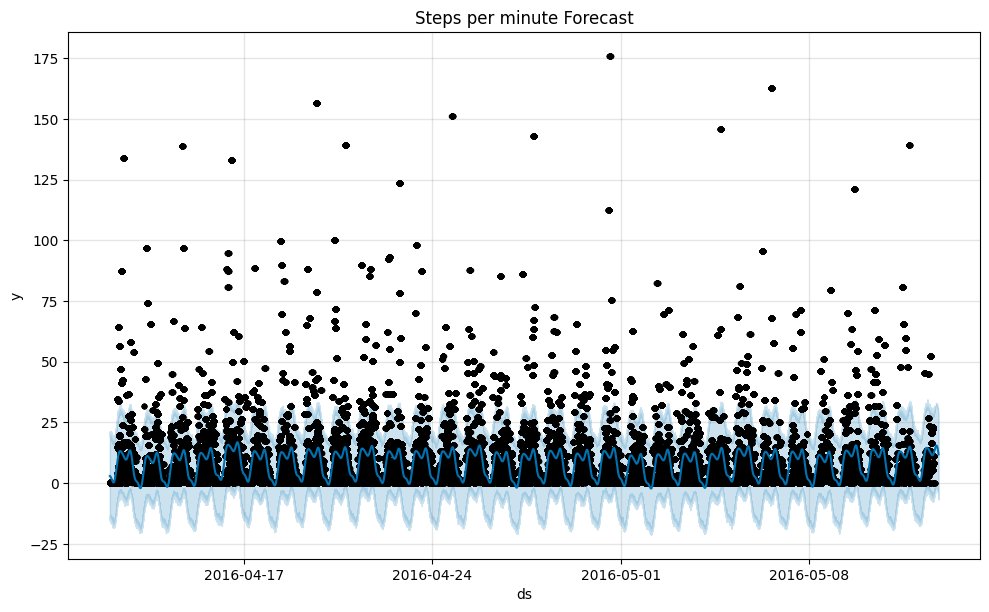

In [49]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
df_steps = df[["Time", "Steps_per_minute"]].rename(
    columns={"Time": "ds", "Steps_per_minute": "y"}
)
df_steps["ds"] = pd.to_datetime(df_steps["ds"])

# Train model
model_steps = Prophet()
model_steps.fit(df_steps)

# Predict
future_steps = model_steps.make_future_dataframe(periods=14, freq="15min")
forecast_steps = model_steps.predict(future_steps)

# Plot
model_steps.plot(forecast_steps)
plt.title("Steps per minute Forecast")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


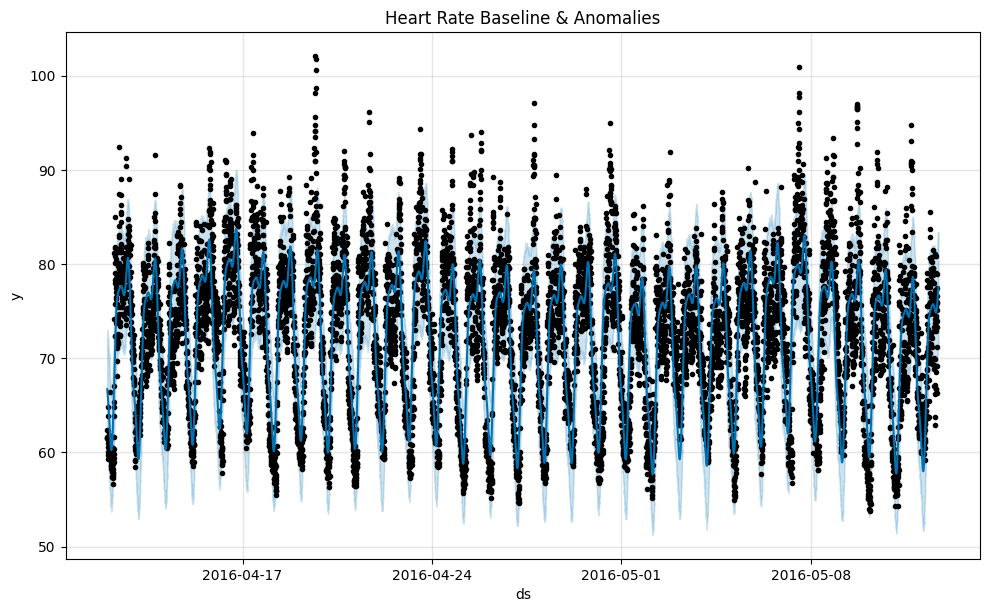

In [ ]:
# Resample heart rate
df_hr = (
    df[["Time", "heart_rate"]]
    .copy()
)
df_hr["Time"] = pd.to_datetime(df_hr["Time"]) # Convert 'date' column to datetime objects
df_hr = df_hr.set_index("Time").resample("5min").mean().reset_index()

# Prophet format
df_hr = df_hr.rename(columns={"Time": "ds", "heart_rate": "y"})
df_hr["ds"] = pd.to_datetime(df_hr["ds"])

# Train
model_hr = Prophet(daily_seasonality=True)
model_hr.fit(df_hr)

# Predict
future_hr = model_hr.make_future_dataframe(periods=10, freq="5min")
forecast_hr = model_hr.predict(future_hr)

# Plot
model_hr.plot(forecast_hr)
plt.title("Heart Rate Baseline & Anomalies")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


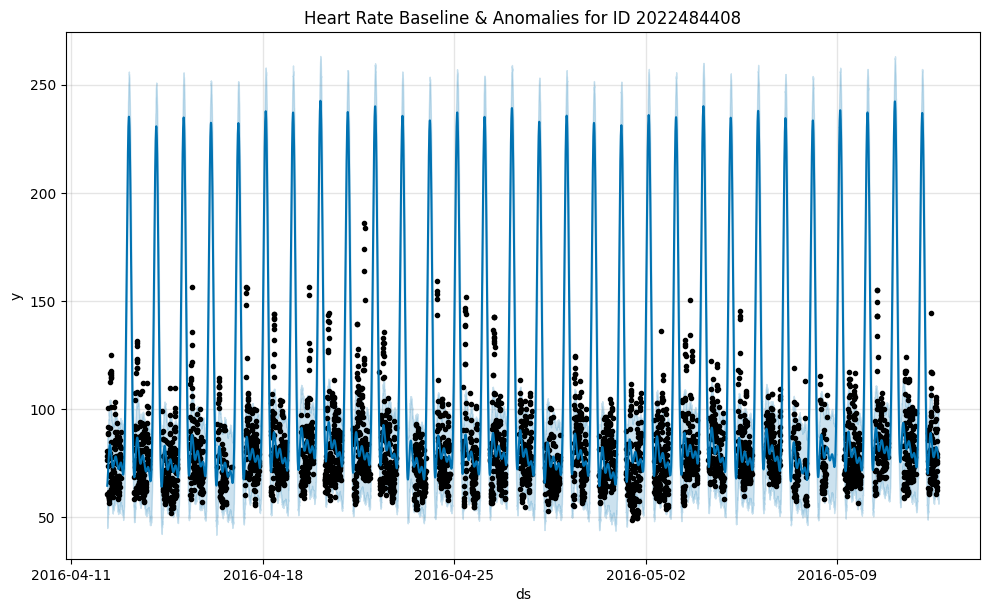

In [47]:
participant_id = 2022484408 # Example: assign a participant ID

# Filter the dataframe for that user
df_user = df[df["Id"] == participant_id][["Time", "heart_rate"]].copy()

# Convert to datetime and resample
df_user["Time"] = pd.to_datetime(df_user["Time"])
df_user = df_user.set_index("Time").resample("5min").mean().reset_index()

# Prepare for Prophet
df_user = df_user.rename(columns={"Time": "ds", "heart_rate": "y"})
df_user["ds"] = pd.to_datetime(df_user["ds"])

# Train Prophet
model_user = Prophet(daily_seasonality=True)
model_user.fit(df_user)

# Predict
future_user = model_user.make_future_dataframe(periods=10, freq="5min")
forecast_user = model_user.predict(future_user)

# Plot
model_user.plot(forecast_user)
plt.title(f"Heart Rate Baseline & Anomalies for ID {participant_id}")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


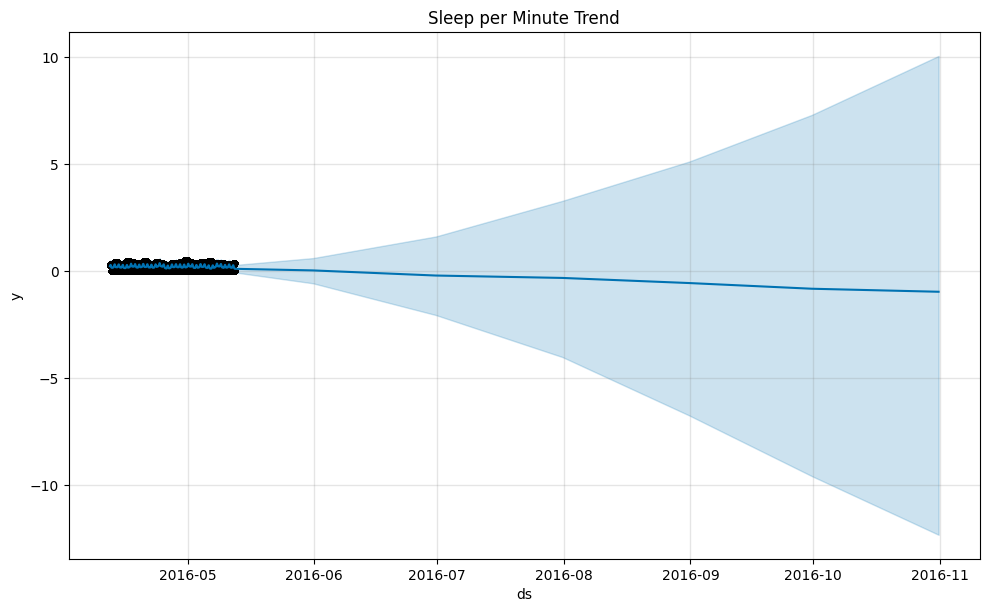

In [ ]:
df_sleep = df[["Time", "Sleep_per_minute"]].rename(
    columns={"Time": "ds", "Sleep_per_minute": "y"}
)
df_sleep["ds"] = pd.to_datetime(df_sleep["ds"])

model_sleep = Prophet(weekly_seasonality=True)
model_sleep.fit(df_sleep)

future_sleep = model_sleep.make_future_dataframe(periods=6, freq="M")
forecast_sleep = model_sleep.predict(future_sleep)

model_sleep.plot(forecast_sleep)
plt.title("Sleep per Minute Trend")
plt.show()

In [ ]:
import pandas as pd

# Merge actual heart rate data with the forecast
anomaly_detection_df = pd.merge(df_hr, forecast_hr[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')

# Identify anomalies: actual value outside the forecasted upper or lower bound
anomalies = anomaly_detection_df[
    (anomaly_detection_df['y'] < anomaly_detection_df['yhat_lower']) |
    (anomaly_detection_df['y'] > anomaly_detection_df['yhat_upper'])
]

print("Potential Heart Rate Anomalies (actual value outside forecast range):")
display(anomalies.head())


Potential Heart Rate Anomalies (actual value outside forecast range):


,ds,y,yhat,yhat_lower,yhat_upper
7,2016-04-12 00:35:00,59.680833,65.919769,60.069609,72.492166
8,2016-04-12 00:40:00,59.349167,65.790355,59.821043,71.822517
64,2016-04-12 05:20:00,56.667500,63.787555,57.355182,69.512010
66,2016-04-12 05:30:00,57.859767,64.493037,58.336851,70.814517
69,2016-04-12 05:45:00,58.957500,65.619931,59.335858,71.714144


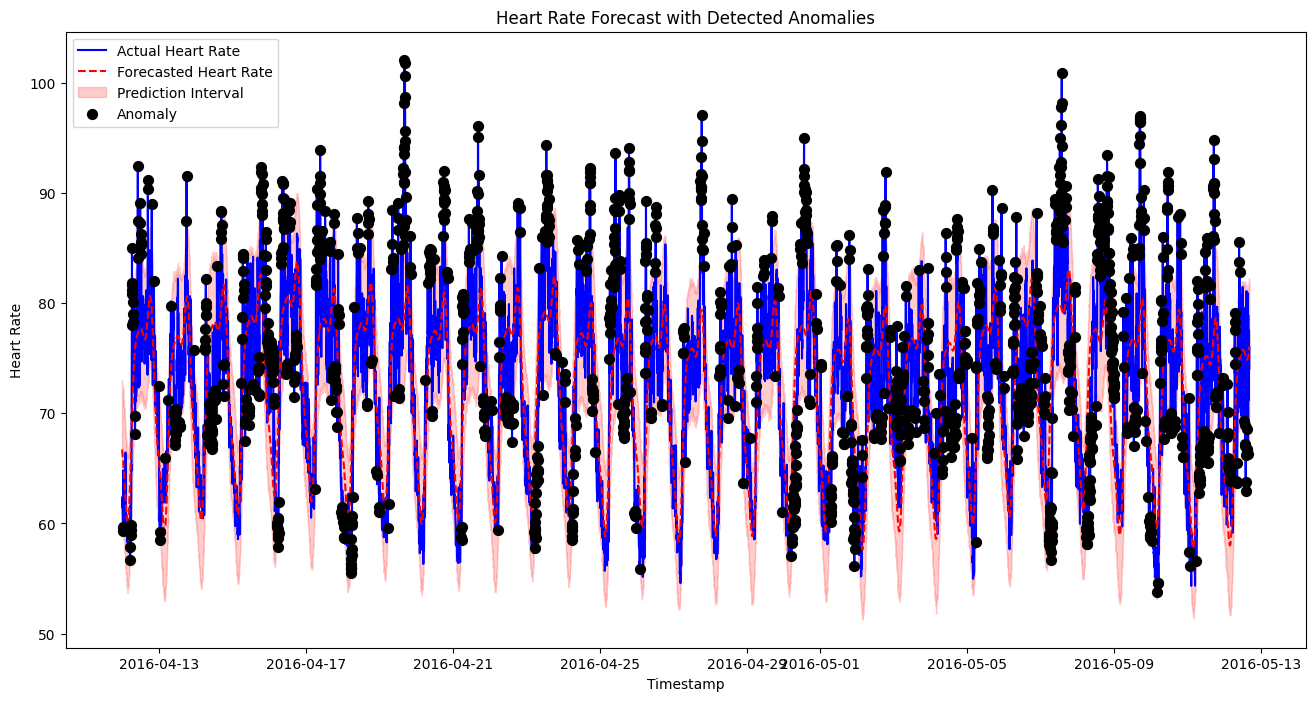

In [ ]:

import matplotlib.pyplot as plt

# Plot the forecast with anomalies highlighted
plt.figure(figsize=(16, 8))
plt.plot(anomaly_detection_df['ds'], anomaly_detection_df['y'], label='Actual Heart Rate', color='blue')
plt.plot(anomaly_detection_df['ds'], anomaly_detection_df['yhat'], label='Forecasted Heart Rate', color='red', linestyle='--')
plt.fill_between(anomaly_detection_df['ds'], anomaly_detection_df['yhat_lower'], anomaly_detection_df['yhat_upper'], color='red', alpha=0.2, label='Prediction Interval')

# Highlight anomalies
plt.scatter(anomalies['ds'], anomalies['y'], color='black', marker='o', s=50, zorder=5, label='Anomaly')

plt.title('Heart Rate Forecast with Detected Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()



In [ ]:
df.columns

Index(['Id', 'Time', 'heart_rate', 'Steps_per_minute', 'Sleep_per_minute'], dtype='object')

In [ ]:
import pandas as pd

# Using 'df' as your DataFrame
df["Time"] = pd.to_datetime(df["Time"])

# Create day window
df["day"] = df["Time"].dt.date

# Display the head of the modified DataFrame to show the new columns
display(df[['Time', 'day']].head())

,Time,day
0,2016-04-12 07:21:00,2016-04-12
1,2016-04-12 07:22:00,2016-04-12
2,2016-04-12 07:23:00,2016-04-12
3,2016-04-12 07:24:00,2016-04-12
4,2016-04-12 07:25:00,2016-04-12


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from tsfresh.utilities.dataframe_functions import roll_time_series

value_columns = ["heart_rate", "Steps_per_minute", "Sleep_per_minute"]

tsfresh_input = df.melt(
    id_vars=["Id", "Time", "day"],
    value_vars=value_columns,
    var_name="kind",
    value_name="value"
)

tsfresh_input = tsfresh_input.rename(columns={
    "day": "id",
    "Time": "time"
})

tsfresh_input = tsfresh_input[["id", "time", "kind", "value"]]

In [ ]:
import numpy as np
from tsfresh import extract_features
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select only 5 users
selected_users = tsfresh_input["id"].unique()[:5]
tsfresh_input_5 = tsfresh_input[tsfresh_input["id"].isin(selected_users)]

# Extract TSFresh features
tsfresh_features = extract_features(
    tsfresh_input_5,
    column_id="id",
    column_sort="time",
    column_kind="kind",
    column_value="value",
    n_jobs=0  # Avoid multiprocessing issues in Colab
)

# Clean extracted features
tsfresh_features.replace([np.inf, -np.inf], np.nan, inplace=True)
tsfresh_features.dropna(axis=1, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tsfresh_features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
tsfresh_features["cluster"] = kmeans.fit_predict(X_scaled)

# Final result
tsfresh_features


Feature Extraction: 100%|██████████| 15/15 [26:00<00:00, 104.03s/it]


,Sleep_per_minute__variance_larger_than_standard_deviation,Sleep_per_minute__has_duplicate_max,Sleep_per_minute__has_duplicate_min,Sleep_per_minute__has_duplicate,Sleep_per_minute__sum_values,Sleep_per_minute__abs_energy,Sleep_per_minute__mean_abs_change,Sleep_per_minute__mean_change,Sleep_per_minute__mean_second_derivative_central,Sleep_per_minute__median,...,heart_rate__fourier_entropy__bins_5,heart_rate__fourier_entropy__bins_10,heart_rate__fourier_entropy__bins_100,heart_rate__permutation_entropy__dimension_3__tau_1,heart_rate__permutation_entropy__dimension_4__tau_1,heart_rate__permutation_entropy__dimension_5__tau_1,heart_rate__permutation_entropy__dimension_6__tau_1,heart_rate__permutation_entropy__dimension_7__tau_1,heart_rate__mean_n_absolute_max__number_of_maxima_7,cluster
2016-04-12,0.0,1.0,1.0,1.0,2055.024306,630.079199,0.153825,-0.000005,-9.682368e-07,0.254167,...,0.908391,1.537815,3.546477,1.791616,3.176958,4.781400,6.540194,8.255102,162.394647,1
2016-04-13,0.0,1.0,1.0,1.0,2315.960417,812.838045,0.190420,0.000000,1.237512e-05,0.300000,...,1.307940,1.926110,3.785320,1.791224,3.176704,4.780608,6.543759,8.253818,152.941760,1
2016-04-14,0.0,1.0,1.0,1.0,2473.063889,782.364793,0.157304,0.000000,2.373509e-06,0.293750,...,1.270856,1.839388,3.776359,1.791511,3.176944,4.781975,6.548899,8.303764,167.359102,1
2016-04-15,0.0,1.0,1.0,1.0,2358.934722,683.696871,0.138287,-0.000020,-3.309462e-06,0.256944,...,1.222590,1.801836,3.737568,1.791632,3.177396,4.783744,6.551279,8.299115,182.090815,2
2016-04-16,0.0,1.0,1.0,1.0,2247.050694,709.351223,0.176611,0.000000,-1.362299e-05,0.247917,...,1.275815,1.903771,3.792235,1.791599,3.176738,4.779573,6.543659,8.277158,168.877755,0


In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = {}

n_samples = X_scaled.shape[0]
for k in range(2, min(n_samples, 7)): # Ensure k <= n_samples - 1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels)
    sil_scores[k] = score
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.077
K=3, Silhouette Score=0.024
K=4, Silhouette Score=0.003


In [43]:
print(tsfresh_features.groupby("cluster").mean())

         Sleep_per_minute__variance_larger_than_standard_deviation  \
cluster                                                              
0                                                      0.0           
1                                                      0.0           
2                                                      0.0           

         Sleep_per_minute__has_duplicate_max  \
cluster                                        
0                                        1.0   
1                                        1.0   
2                                        1.0   

         Sleep_per_minute__has_duplicate_min  Sleep_per_minute__has_duplicate  \
cluster                                                                         
0                                        1.0                              1.0   
1                                        1.0                              1.0   
2                                        1.0                              1.0   

  

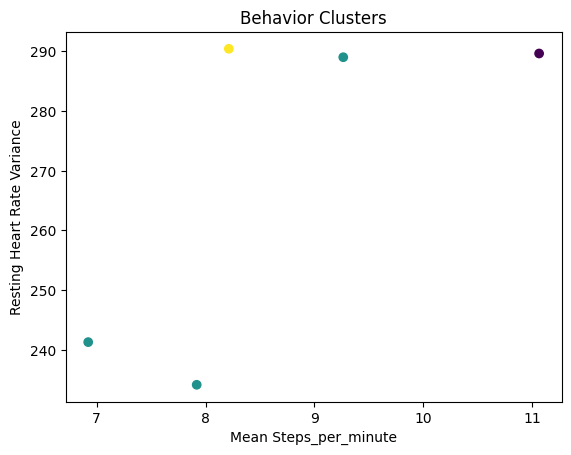

In [46]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(
    tsfresh_features["Steps_per_minute__mean"],
    tsfresh_features["heart_rate__variance"],
    c=tsfresh_features["cluster"]
)
plt.xlabel("Mean Steps_per_minute")
plt.ylabel("Resting Heart Rate Variance")
plt.title("Behavior Clusters")
plt.show()